/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: ComplexWarning: Casting complex values to real discards the imaginary part
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: ComplexWarning: Casting complex values to real discards the imaginary part
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: ComplexWarning: Casting complex values to real discards the imaginary part


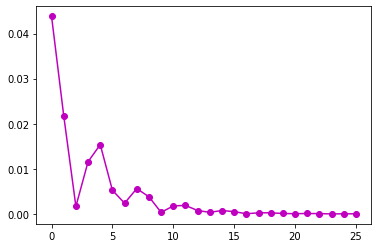

In [72]:
import numpy as np
import matplotlib.pyplot as plt

N = 26
C = 1
#m = 1
k = 6
omega = 2
gamma=1
alpha = np.complex(2*k-m*omega*omega,gamma*omega) 
#print(alpha)

A = np.zeros([N,N],complex)

for i in range(N-1):
    A[i,i] = alpha
    A[i,i+1] = -k
    A[i+1,i] = -k
A[0,0] = alpha - k
A[N-1,N-1] = alpha - k
#print(A)

v = np.zeros(N,float)
v[0] = C

for i in range(N-1):
    A[i,i+1] /= A[i,i]
    v[i] /= A[i,i]
    A[i+1,i+1] -= A[i+1,i]*A[i,i+1]
    v[i+1] -= A[i+1,i]*v[i]
v[N-1] /= A[N-1,N-1]
x = np.empty(N,complex)
x[N-1] = v[N-1]
for i in range(N-2,-1,-1):
    x[i] = v[i] - A[i,i+1]*x[i+1]
    
x = np.matmul(np.linalg.inv(A), v)

plt.plot(abs(np.imag(x)),"m-o")
plt.show()

As the position increases, the amplitude decreases, as is expected in damping.

$\gamma$ is the damping constant, and is the coefficient which determines the magnitude of the damping. As the position increases, the magnitude of the imaginary part of the vector decreases as well.